### Question
What is the maximum number of edges in a graph on 12 vertices whose clique number is equal to 2?

### Solution

A graph with clique number 2 means the largest clique has size 2 (i.e., it's triangle-free - no 3 vertices are all connected).

By **Turán's theorem**, the maximum number of edges in a triangle-free graph is achieved by a **complete bipartite graph** with parts as equal as possible.


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# For n vertices with clique number 2, the maximum edges is achieved by
# a complete bipartite graph K_{n/2, n/2} (for even n)

n = 12
part1_size = n // 2  # 6 vertices
part2_size = n - part1_size  # 6 vertices

# Calculate maximum number of edges
max_edges = part1_size * part2_size
print(f"For a graph with {n} vertices and clique number 2:")
print(f"Maximum number of edges: {max_edges}")
print(f"\nThis is achieved by a complete bipartite graph K_{{{part1_size},{part2_size}}}")

For a graph with 12 vertices and clique number 2:
Maximum number of edges: 36

This is achieved by a complete bipartite graph K_{6,6}


### Verification: Build and verify the graph

In [4]:
# Create a complete bipartite graph K_{6,6}
G = nx.complete_bipartite_graph(6, 6)

# Verify properties
print(f"Number of vertices: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Find the clique number
cliques = list(nx.find_cliques(G))
max_clique_size = max(len(c) for c in cliques)
print(f"Clique number: {max_clique_size}")

# Verify it's bipartite (triangle-free)
print(f"Is bipartite: {nx.is_bipartite(G)}")
print(f"Contains triangles: {sum(nx.triangles(G).values()) > 0}")

Number of vertices: 12
Number of edges: 36
Clique number: 2
Is bipartite: True
Contains triangles: False


### Visualize the optimal graph K_{6,6}


/var/folders/78/lstcwc951zs14wpz1_zzh_cc0000gn/T/ipykernel_81332/2755858217.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


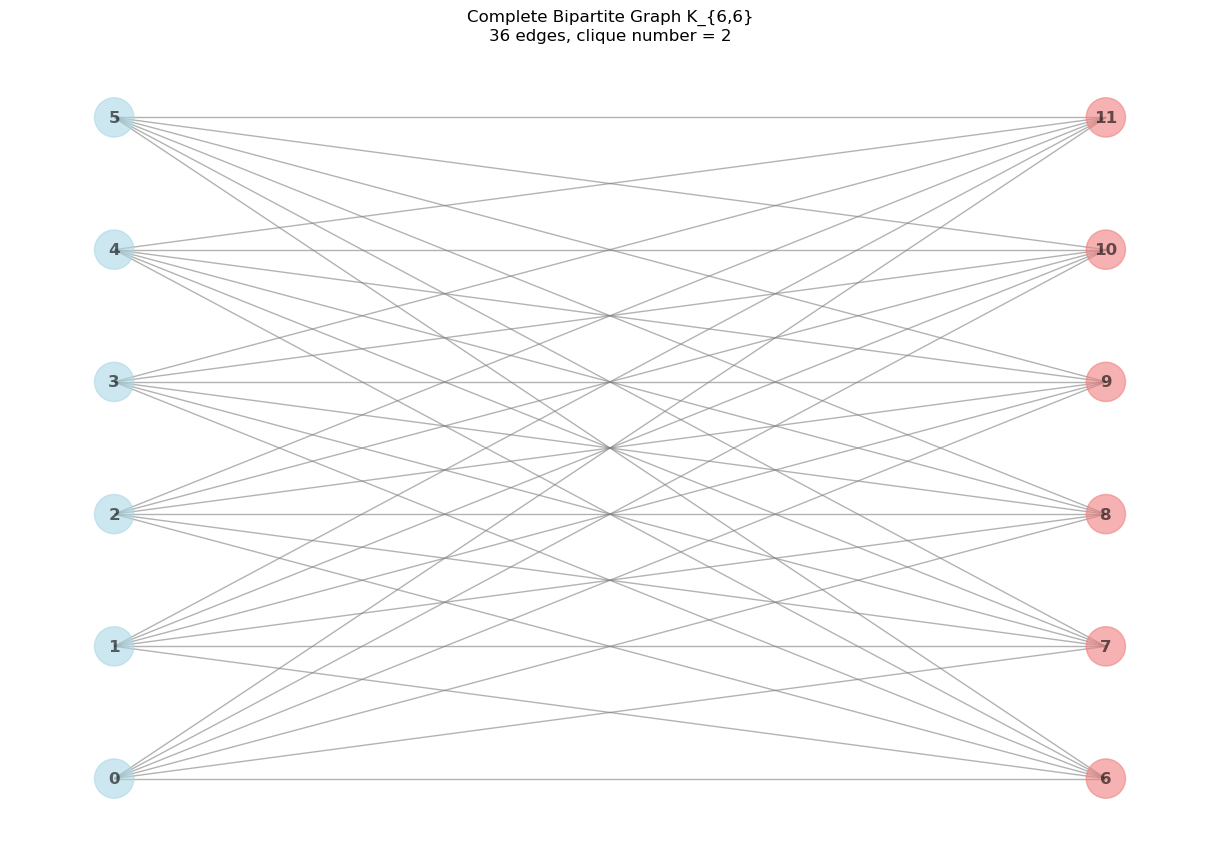

In [5]:
# Visualize the complete bipartite graph
left_nodes = range(6)
right_nodes = range(6, 12)

pos = nx.bipartite_layout(G, left_nodes)

plt.figure(figsize=(12, 8))

# Color the two parts differently
node_colors = ['lightblue' if node < 6 else 'lightcoral' for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=node_colors, 
        node_size=800, font_size=12, font_weight='bold',
        edge_color='gray', width=1, alpha=0.6)

plt.title(f"Complete Bipartite Graph K_{{6,6}}\n{G.number_of_edges()} edges, clique number = {max_clique_size}")
plt.axis('off')
plt.tight_layout()
plt.show()


### General Formula (Turán's Theorem)

For a graph with $n$ vertices and clique number $k$, the maximum number of edges is given by the **Turán graph** $T(n, k)$.

For clique number $k = 2$ (triangle-free graphs):
- Divide $n$ vertices into 2 parts as evenly as possible
- Connect all vertices from one part to all vertices in the other part

**Formula for $k = 2$:**
$$\text{max edges} = \lfloor n/2 \rfloor \cdot \lceil n/2 \rceil = \begin{cases}
\frac{n^2}{4} & \text{if } n \text{ is even} \\
\frac{n^2-1}{4} & \text{if } n \text{ is odd}
\end{cases}$$

For $n = 12$: $\frac{12^2}{4} = \frac{144}{4} = 36$ edges


In [6]:
# Test the formula for various values of n
import math

def max_edges_clique_2(n):
    """Calculate maximum edges for n vertices with clique number 2"""
    part1 = n // 2
    part2 = n - part1
    return part1 * part2

print("Maximum edges for triangle-free graphs:\n")
print("n vertices | max edges | formula")
print("-" * 40)
for n in range(2, 21):
    max_e = max_edges_clique_2(n)
    if n % 2 == 0:
        formula = f"n²/4 = {n}²/4 = {n*n//4}"
    else:
        formula = f"(n²-1)/4 = ({n}²-1)/4 = {(n*n-1)//4}"
    print(f"{n:2d}         | {max_e:3d}       | {formula}")
    
print(f"\n✓ Answer for n=12: {max_edges_clique_2(12)} edges")


Maximum edges for triangle-free graphs:

n vertices | max edges | formula
----------------------------------------
 2         |   1       | n²/4 = 2²/4 = 1
 3         |   2       | (n²-1)/4 = (3²-1)/4 = 2
 4         |   4       | n²/4 = 4²/4 = 4
 5         |   6       | (n²-1)/4 = (5²-1)/4 = 6
 6         |   9       | n²/4 = 6²/4 = 9
 7         |  12       | (n²-1)/4 = (7²-1)/4 = 12
 8         |  16       | n²/4 = 8²/4 = 16
 9         |  20       | (n²-1)/4 = (9²-1)/4 = 20
10         |  25       | n²/4 = 10²/4 = 25
11         |  30       | (n²-1)/4 = (11²-1)/4 = 30
12         |  36       | n²/4 = 12²/4 = 36
13         |  42       | (n²-1)/4 = (13²-1)/4 = 42
14         |  49       | n²/4 = 14²/4 = 49
15         |  56       | (n²-1)/4 = (15²-1)/4 = 56
16         |  64       | n²/4 = 16²/4 = 64
17         |  72       | (n²-1)/4 = (17²-1)/4 = 72
18         |  81       | n²/4 = 18²/4 = 81
19         |  90       | (n²-1)/4 = (19²-1)/4 = 90
20         | 100       | n²/4 = 20²/4 = 100

✓ Answe